##  Inverse Method for exponentials

1. Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random deviates from an Exponential distribution with mean $\mu$. $\mu$ and the number of random deviates should be arguments to your function. Be aware that there are two standard methods for parameterizing the Exponential.
2. For some particular $\mu$ of your choosing, make a histogram of the random deviates and plot the appropriate Exponential density curve on top of the histogram to confirm that the generator is working. Verify that the mean and standard deviation are what they should be.
3. Compare the speed of your Exponential generator to the language generator (rexp in R, numpy.random.exponential in Python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.

In [1]:
import numpy as np
from numpy import random

In [2]:
np.log(10.0)

2.302585092994046

In [3]:
def exp_rand(n,mu):
    return -mu*np.log(np.random.uniform(size=n))

In [4]:
n = 100000
mu = 2.0
x = exp_rand(n,mu)

In [5]:
print(np.mean(x))
print(np.std(x))

1.9911448489391594
1.9914430662721334


C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


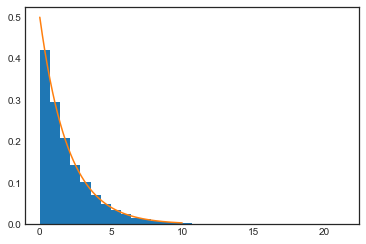

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(x,bins=30,normed=True);

z = np.linspace(0, 10, 1000)
y = np.sin(z[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
y = np.exp(-z/mu)/mu
lines = plt.plot(z, y)


In [7]:
n = 100000
%timeit y = np.random.exponential(mu,n)

4.18 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit y = exp_rand(n,mu)

3.86 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Question 2: Simulation Study of the LLN and CLT

1. Create a $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $1$ with probability $p=0.5$ and $0$ with probability $1-p=0.5$. For intuition, consider the following situation: suppose 1/2 of all voters support proposition A and that we conduct 100 surveys (number of rows of X) each with 1000 voters (number of columns = sample size of poll). A voter responds 1 if they support A, 0 if they do not support A. Note on confusing notation: the sample size of each poll is $m$. Usually $n$ is sample size, but here it is the number of surveys.
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $j$ entry of $Y$ is
$$Y_{ij} = \frac{1}{j} \sum_{k=1}^j X_{ik}$$
for $i=1,\dots,n$ and $j=1,\dots,m$. Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y-axis) against the column number (on the x-axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 10th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://nbviewer.jupyter.org/urls/david-jones-statistics.github.io/statcomp/lectures/topic1-intro/00intro.ipynb)  for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in Python from VanderPlas).
4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ of length $m$ giving the running variance of the means across the $n$ surveys. Plot $1/\boldsymbol{u}_j$ (on the y-axis) against $j$ (on the x-axis), and add a line showing $j/(p(1-p))$, for $j=1,\dots,m$. 
5. Explain what the simulation results in parts 3 and 4 are showing.

In [9]:
## question 1
n = 100
m = 1000
X = np.random.binomial(n=1,p=0.5,size=n*m)
X = X.reshape((n, m))
X

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 0]])

In [10]:
## question 2
Y = np.zeros(n*m).reshape((n,m))

In [11]:
for ii in np.arange(n):
    for jj in np.arange(m):
        Y[ii,jj] = np.mean(X[ii,:(jj+1)])

In [12]:
## maybe faster, perhaps harder to understand
Y2 = np.cumsum(X,axis=1)/(np.arange(m)+1)

In [13]:
np.sum(np.abs(Y - Y2)) ## are they the same

0.0

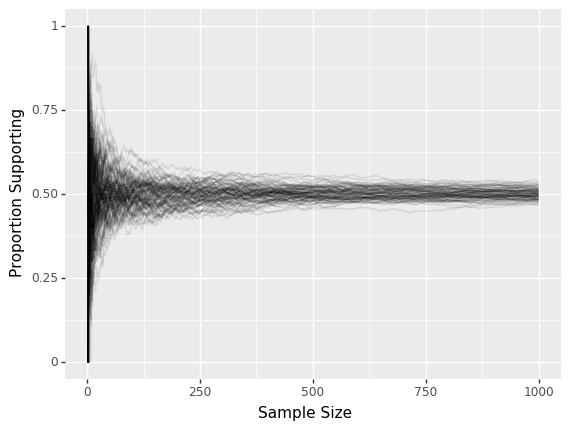

<ggplot: (-9223371895382541864)>

In [14]:
## question 3
from plotnine import *
import pandas as pd
df1 = pd.DataFrame()
df1['Y'] = Y.reshape((100000))
df1['samp_size'] = np.tile(np.arange(m) + 1, 100)
df1['survey'] = np.repeat(np.arange(n) + 1, 1000)
(ggplot(df1, aes(x = 'samp_size', y = 'Y', group = 'survey'))
 + geom_line(alpha = 0.1)
 + xlab('Sample Size')
 + ylab('Proportion Supporting'))

### Interpretation of Above Plot

The Law of Large Numbers (LLN) says that the sample mean converges to the population mean as the sample size grows (with probability 1). Each poll is a sample (100 samples). As each of these sample grows (starting at size 1 and growing up to 1000), we see that the mean is converging to 1/2.

C:\Users\gaura\Anaconda3\lib\site-packages\plotnine\facets\facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


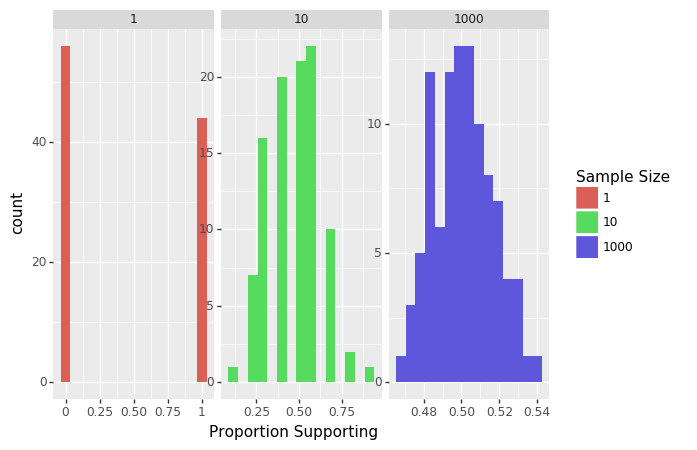

<ggplot: (-9223371895381274660)>

In [15]:
df2 = pd.DataFrame()
df2['Y'] = np.hstack((Y[:, 0], Y[:, 9], Y[:, m - 1]))
df2['samp_size'] = np.hstack((np.repeat(1, n), np.repeat(10, n), np.repeat(m, n)))
(ggplot(df2, aes(x = 'Y', fill = 'factor(samp_size)'))
 + geom_histogram(bins = 15)
 + facet_wrap('~samp_size', scales = 'free')
 + xlab('Proportion Supporting')
 + scale_fill_discrete(name = 'Sample Size'))

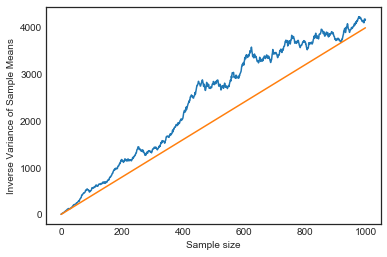

In [16]:
## question 4
p = 0.5
plt.plot(1/np.var(Y,axis=0))
plt.xlabel('Sample size');
plt.ylabel('Inverse Variance of Sample Means');
plt.plot(np.arange(m),np.arange(m)/(p*(1-p)));

### Interpretation of Above Plots

The Central Limit Theorem (CLT) refines the Law of Large Numbers by describing the distribution of the sample mean around the population mean. For large sample sizes the distribution is approximately Normal with standard deviation equal to the standard deviation of one observation $\sqrt{p(1-p)}=0.5$ over the square root of the sample size. For a poll with 1000 participants that is
\begin{equation*}
0.5 / \sqrt{1000} \approx 0.016
\end{equation*}
The is roughly confirmed by the histogram on right of the plot for part 3.

The plot for part 4 further confirms that the inverse variance of the sample mean is increasing linearly with sample size, as stated in the CLT.